In [1]:
# importing all the necessary libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
df=pd.read_csv("C:\\Users\\kvsan\\Desktop\\data analysis\\Student_Performance.csv")

In [3]:
# viewing the DataFrame
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape # checking the shape

(10000, 6)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum() ## no null values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated().sum() ## 127 duplicates 

127

In [8]:
df.drop_duplicates(inplace=True) # deleted duplicates

In [9]:
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


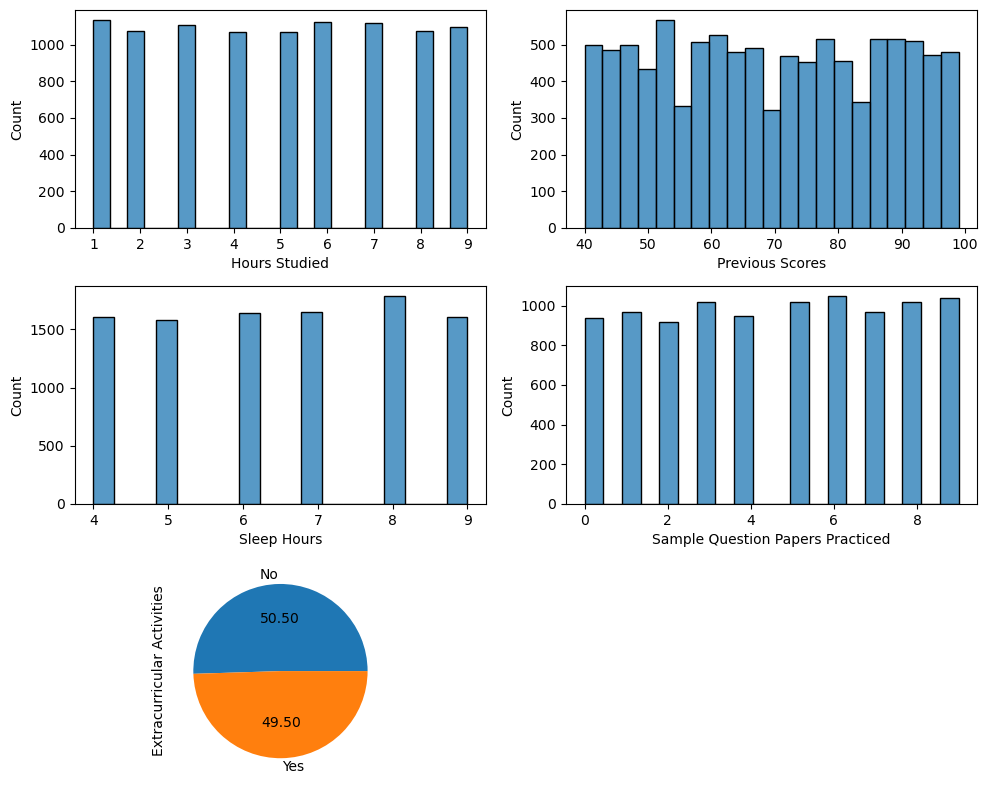

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.histplot(df["Hours Studied"])
plt.subplot(3,2,2)
sns.histplot(df["Previous Scores"])
plt.subplot(3,2,3)
sns.histplot(df["Sleep Hours"])
plt.subplot(3,2,4)
sns.histplot(df["Sample Question Papers Practiced"])
plt.subplot(3,2,5)
df["Extracurricular Activities"].value_counts().plot(kind="pie",autopct="%2.2f")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
# spliting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:5],df.iloc[:,-1],test_size=0.2,random_state=2)

## One Hot Encoding

In [14]:
#performing OneHotencoding for extracurricular activities in both train and test
x_train_trans=pd.get_dummies(x_train,columns=["Extracurricular Activities"])
x_test_trans=pd.get_dummies(x_test,columns=["Extracurricular Activities"])

## With Considering Extracurricular Activities

In [17]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
# Training the model
lr.fit(x_train_trans,y_train)

LinearRegression()

In [19]:
lr.coef_

array([ 2.84941335,  1.0180357 ,  0.48164095,  0.19413131, -0.30205772,
        0.30205772])

In [20]:
lr.intercept_

-33.740126832306245

In [21]:
lr.predict(x_test_trans).shape

(1975,)

In [23]:
# r2 score after predicting
from sklearn.metrics import r2_score 
r2_score(y_test,lr.predict(x_test_trans))

0.9894961318217909

## With Considering Extracurricular Activities

In [27]:
lr1=LinearRegression()

In [37]:
x_train.drop("Extracurricular Activities",axis=1,inplace=True) # droping Extracurricular Activities from both train and test data

In [34]:
x_test.drop("Extracurricular Activities",axis=1,inplace=True)

In [35]:
lr1.fit(x_train,y_train) # training the model

LinearRegression()

In [38]:
lr1.predict(x_test).shape

(1975,)

In [39]:
r2_score(y_test,lr1.predict(x_test))

0.9892037923716559

In [40]:
## r2 score with and with out extracaricular activities is same which means extra ciricular activities has no impact

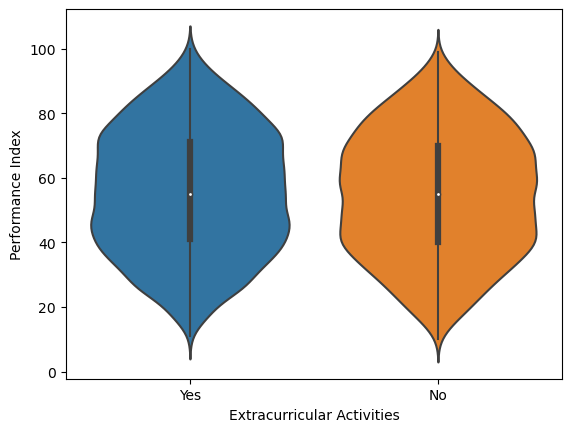

In [41]:
sns.violinplot(df,x="Extracurricular Activities",y="Performance Index")
plt.show()

In [166]:
## the distribution is all most the same

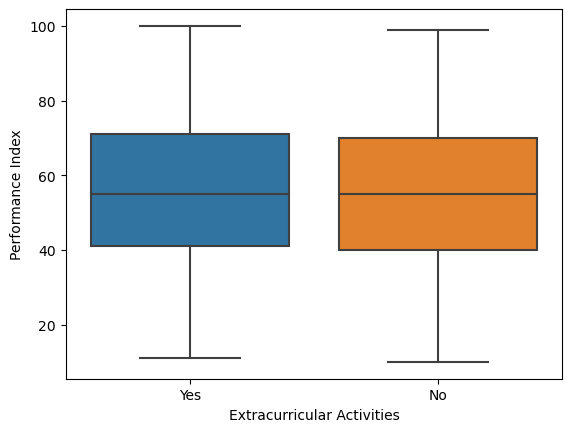

In [167]:
sns.boxplot(df,x="Extracurricular Activities",y="Performance Index")
plt.show()

In [42]:
# The distribution of vilion plot and box plot are same so there is no impact of extracurricular activities